In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
ORG_NAME = "HUWA-DAO"
SPLITS_FREQ = "2d"
LAST_FOLDS = 6
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2021-11-13"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2021-07-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.075084
2021-07-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069018
2021-07-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069192
2021-07-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069922
2021-07-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-22,0.714286,0.476190,0.285714,0.142857,0.095238,0.014286,0.714286,0.894551,0.894551,0.894551,...,1.0,1.0,1.0,0.700000,1.000000,1.000000,1.000000,1.000000,1.000000,0.123530
2023-06-24,0.750000,0.500000,0.300000,0.150000,0.100000,0.015000,0.750000,0.907732,0.907732,0.907732,...,1.0,1.0,1.0,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,0.122245
2023-06-26,0.666667,0.666667,0.433333,0.216667,0.144444,0.021667,0.666667,0.865571,0.865571,0.865571,...,1.0,1.0,1.0,0.437500,0.850000,0.900000,0.900000,0.900000,0.900000,0.123097


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2021-07-22,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.073952
2021-07-24,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.073584
2021-07-26,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.072641
2021-07-28,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.073329
2021-07-30,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.073622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-22,1.0,0.476190,0.285714,0.142857,0.095238,0.014286,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.785714,1.000000,1.0,1.0,1.0,1.0,0.128841
2023-06-24,1.0,0.500000,0.300000,0.150000,0.100000,0.015000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.750000,1.000000,1.0,1.0,1.0,1.0,0.128345
2023-06-26,1.0,0.666667,0.433333,0.216667,0.144444,0.021667,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.541667,0.958333,1.0,1.0,1.0,1.0,0.129327


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2021-07-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.075084,openpop
2021-07-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069018,openpop
2021-07-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069192,openpop
2021-07-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069922,openpop
2021-07-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069731,openpop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-22,0.714286,0.476190,0.285714,0.142857,0.095238,0.014286,0.714286,0.894551,0.894551,0.894551,...,1.0,1.0,0.700000,1.000000,1.000000,1.000000,1.000000,1.000000,0.123530,openpop
2023-06-24,0.750000,0.500000,0.300000,0.150000,0.100000,0.015000,0.750000,0.907732,0.907732,0.907732,...,1.0,1.0,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,0.122245,openpop
2023-06-26,0.666667,0.666667,0.433333,0.216667,0.144444,0.021667,0.666667,0.865571,0.865571,0.865571,...,1.0,1.0,0.437500,0.850000,0.900000,0.900000,0.900000,0.900000,0.123097,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2021-11-05,10.0,7d,2021-11-05,0.001693,0.013392,217.0,195.0,209.600000,0.200000,0.200000,...,0.052632,0.105263,0.157895,0.315789,0.473684,0.578947,0.140972,itemknn,test,NaN
2021-11-07,3.0,10YE,2021-11-07,0.003914,0.158259,167.0,154.0,166.358025,0.006173,0.004115,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.493147,itemknn,test,NaN
2021-11-09,4.0,10YE,2021-11-09,0.002625,0.035536,118.0,110.0,116.346154,0.000000,0.012821,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.156706,itemknn,test,NaN
2021-11-11,7.0,7d,2021-11-11,0.001862,0.018106,94.0,93.0,93.636364,0.000000,0.090909,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.132383,itemknn,test,NaN
2021-11-13,9.0,7d,2021-11-13,0.005779,0.009458,80.0,80.0,80.000000,0.600000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130642,itemknn,test,NaN
2021-11-05,1.0,7d,2021-11-05,0.000686,0.009076,217.0,195.0,209.600000,0.200000,0.133333,...,0.052632,0.105263,0.157895,0.315789,0.368421,0.368421,0.141221,userknn,test,NaN
2021-11-07,4.0,90d,2021-11-07,0.001043,0.123640,167.0,154.0,166.358025,0.000000,0.006173,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.487545,userknn,test,NaN
2021-11-09,3.0,90d,2021-11-09,0.001040,0.026774,118.0,110.0,116.346154,0.153846,0.141026,...,0.833333,0.916667,0.916667,0.916667,0.916667,0.916667,0.164971,userknn,test,NaN
2021-11-11,5.0,7d,2021-11-11,0.000748,0.012614,94.0,93.0,93.636364,0.909091,0.333333,...,0.950000,0.950000,0.950000,0.950000,0.950000,0.950000,0.137531,userknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2021-11-05,10.0,7d,2021-11-05,0.001693,0.013392,217.0,195.0,209.600000,0.200000,0.200000,...,0.052632,0.105263,0.157895,0.315789,0.473684,0.578947,0.140972,itemknn,test,NaN
2021-11-07,3.0,10YE,2021-11-07,0.003914,0.158259,167.0,154.0,166.358025,0.006173,0.004115,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.493147,itemknn,test,NaN
2021-11-09,4.0,10YE,2021-11-09,0.002625,0.035536,118.0,110.0,116.346154,0.000000,0.012821,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.156706,itemknn,test,NaN
2021-11-11,7.0,7d,2021-11-11,0.001862,0.018106,94.0,93.0,93.636364,0.000000,0.090909,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.132383,itemknn,test,NaN
2021-11-13,9.0,7d,2021-11-13,0.005779,0.009458,80.0,80.0,80.000000,0.600000,0.333333,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.130642,itemknn,test,NaN
2021-11-05,1.0,7d,2021-11-05,0.000686,0.009076,217.0,195.0,209.600000,0.200000,0.133333,...,0.052632,0.105263,0.157895,0.315789,0.368421,0.368421,0.141221,userknn,test,NaN
2021-11-07,4.0,90d,2021-11-07,0.001043,0.123640,167.0,154.0,166.358025,0.000000,0.006173,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.487545,userknn,test,NaN
2021-11-09,3.0,90d,2021-11-09,0.001040,0.026774,118.0,110.0,116.346154,0.153846,0.141026,...,0.833333,0.916667,0.916667,0.916667,0.916667,0.916667,0.164971,userknn,test,NaN
2021-11-11,5.0,7d,2021-11-11,0.000748,0.012614,94.0,93.0,93.636364,0.909091,0.333333,...,0.950000,0.950000,0.950000,0.950000,0.950000,0.950000,0.137531,userknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

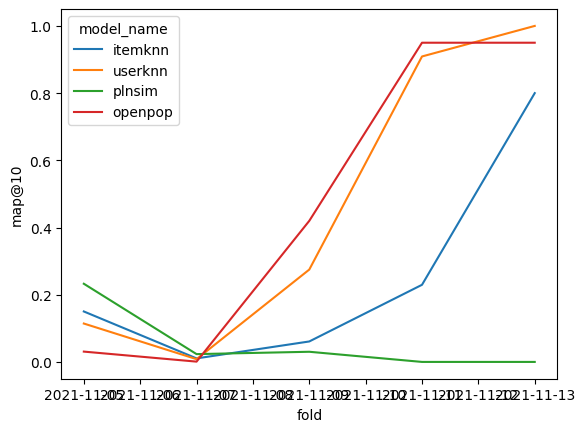

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2021-11-03,10,7d,2021-11-03,0.001634,0.006990,39,36,37.666667,0.333333,0.333333,0.333333,0.266667,...,0.088889,0.288889,1.000000,0.033333,0.100000,0.166667,0.266667,0.366667,0.800000,0.129643
2021-11-05,3,10YE,2021-11-05,0.001938,0.014082,217,195,209.600000,0.200000,0.200000,0.200000,0.200000,...,0.573684,0.594737,0.825564,0.052632,0.105263,0.210526,0.368421,0.473684,0.578947,0.140395
2021-11-07,4,10YE,2021-11-07,0.002692,0.157593,167,154,166.358025,0.006173,0.004115,0.003704,0.001852,...,0.018519,0.195988,0.407922,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.492253
2021-11-09,7,7d,2021-11-09,0.002153,0.029209,118,110,116.181818,0.000000,0.015152,0.027273,0.040909,...,0.386364,0.590909,0.988636,0.000000,NaN,NaN,NaN,NaN,NaN,0.150769
2021-11-11,9,7d,2021-11-11,0.001813,0.017928,94,93,93.636364,0.000000,0.090909,0.163636,0.090909,...,0.909091,0.954545,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.132014
2021-11-13,8,7d,2021-11-13,0.015106,0.009493,80,80,80.000000,0.600000,0.333333,0.200000,0.100000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.131080
